In [23]:
# Step 0: Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
# Load data (skip extra rows)
df = pd.read_csv('National park service.csv', skiprows=2)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df = df.dropna(how='all')

# Clean numeric columns
df['recreation_visits'] = df['recreation_visits'].str.replace(',', '').astype(int)
df['recreation_hours'] = df['recreation_hours'].str.replace(',', '').astype(int)

# Save to CSV
df.to_csv('cleaned_nps_data.csv', index=False)

print("Cleaned data saved to 'cleaned_nps_data.csv'")


Cleaned data saved to 'cleaned_nps_data.csv'


In [63]:
# # Encode categorical columns
# le = LabelEncoder()
# for col in df.select_dtypes(include='object').columns:
#     if df[col].nunique() > 0:
#         df[col] = le.fit_transform(df[col])

encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le



In [26]:
# Define features and target
X = df.drop('recreation_visits', axis=1)
y = df['recreation_visits']

# Scale features (not target)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [56]:
# Split into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# # Define models
# models = {
#     "Linear Regression": LinearRegression(),
#     "Random Forest": RandomForestRegressor(random_state=42),
#     "Gradient Boosting": GradientBoostingRegressor(random_state=42)
# }

In [58]:
# 4. Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# 5. Train and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name} => RMSE: {rmse:.2f}, R2: {r2:.2f}")

# 6. Select best model
best_model_name = min(results, key=lambda k: results[k]['RMSE'])
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name} with RMSE: {results[best_model_name]['RMSE']:.2f}")

# 7. Predict with new











Linear Regression => RMSE: 110939.56, R2: 0.63
Random Forest => RMSE: 24882.04, R2: 0.98
Gradient Boosting => RMSE: 45898.58, R2: 0.94

✅ Best model: Random Forest with RMSE: 24882.04


In [29]:
# Train, predict and evaluate each model
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name} => RMSE: {rmse:.2f}, R2: {r2:.2f}")


Linear Regression => RMSE: 110939.56, R2: 0.63
Random Forest => RMSE: 24882.04, R2: 0.98
Gradient Boosting => RMSE: 45898.58, R2: 0.94


In [51]:
# Pick best model based on RMSE
best_model_name = min(results, key=lambda k: results[k]['RMSE'])
print(f"\nBest model: {best_model_name} with RMSE: {results[best_model_name]['RMSE']:.2f} and R2: {results[best_model_name]['R2']:.2f}")


Best model: Random Forest with RMSE: 24882.04 and R2: 0.98


Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 4776 entries, 0 to 4775
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   park               4776 non-null   int64  
 1   unit_code          4776 non-null   int64  
 2   park_type          4776 non-null   int64  
 3   region             4776 non-null   int64  
 4   state              4776 non-null   int64  
 5   year               4776 non-null   float64
 6   month              4776 non-null   float64
 7   recreation_visits  4776 non-null   int64  
 8   recreation_hours   4776 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 373.1 KB
None

Summary Statistics:
              park    unit_code    park_type       region        state  \
count  4776.000000  4776.000000  4776.000000  4776.000000  4776.000000   
mean    198.500000   198.500000     7.195980     3.314070    26.680905   
std     114.904371   114.904371     4.030682     1.883569   

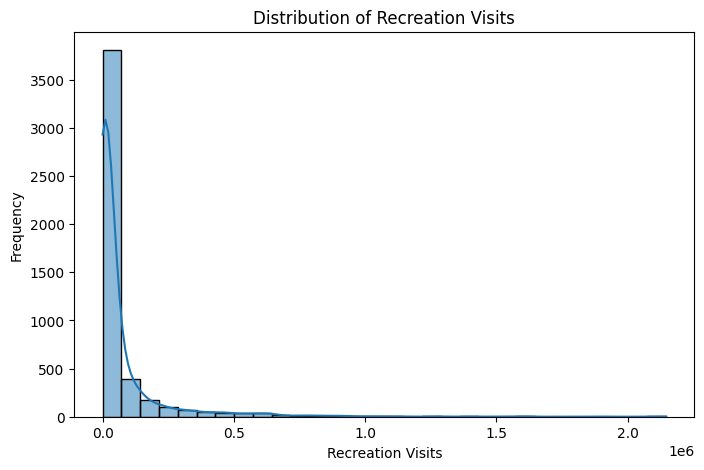

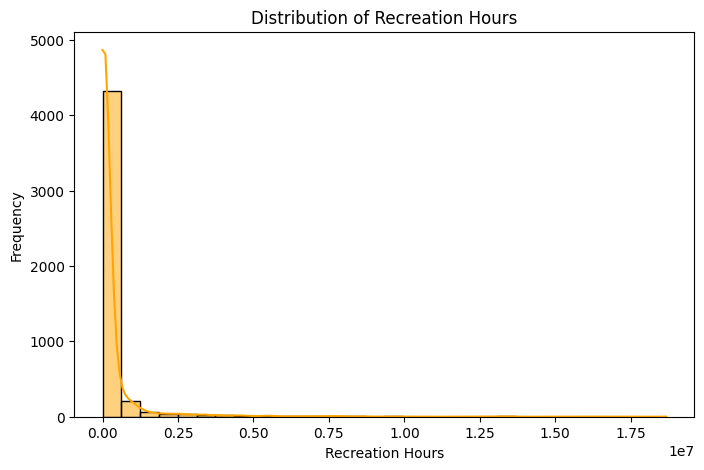

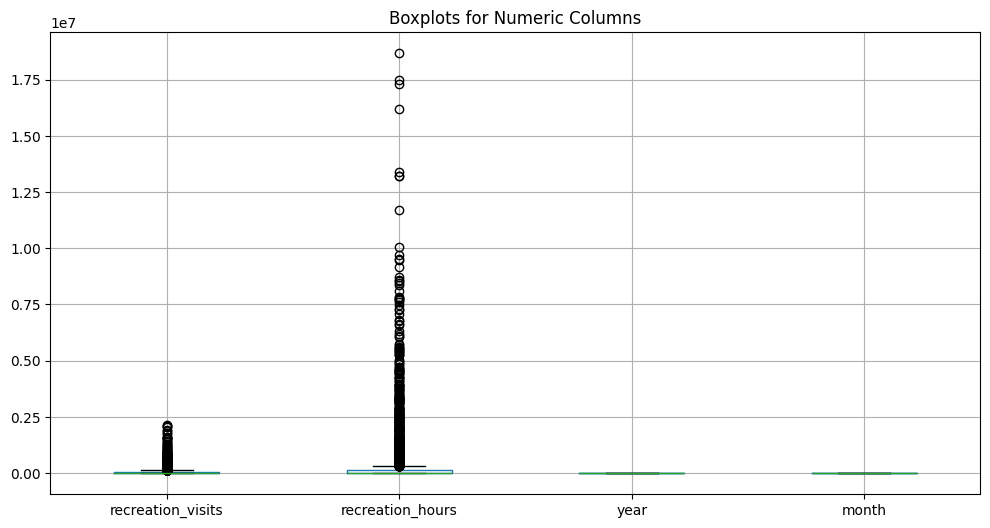

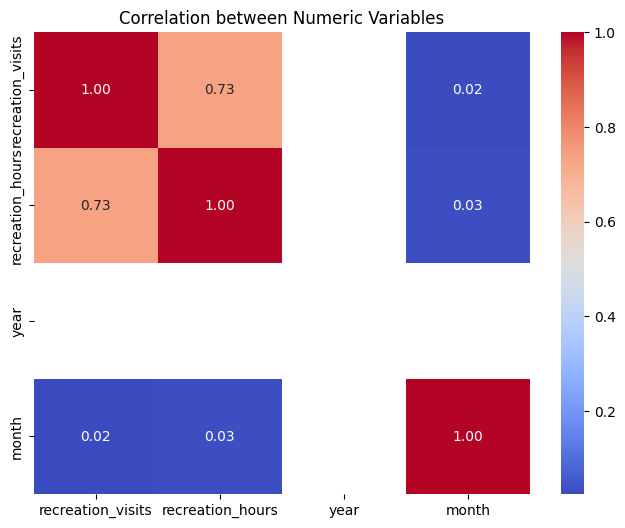

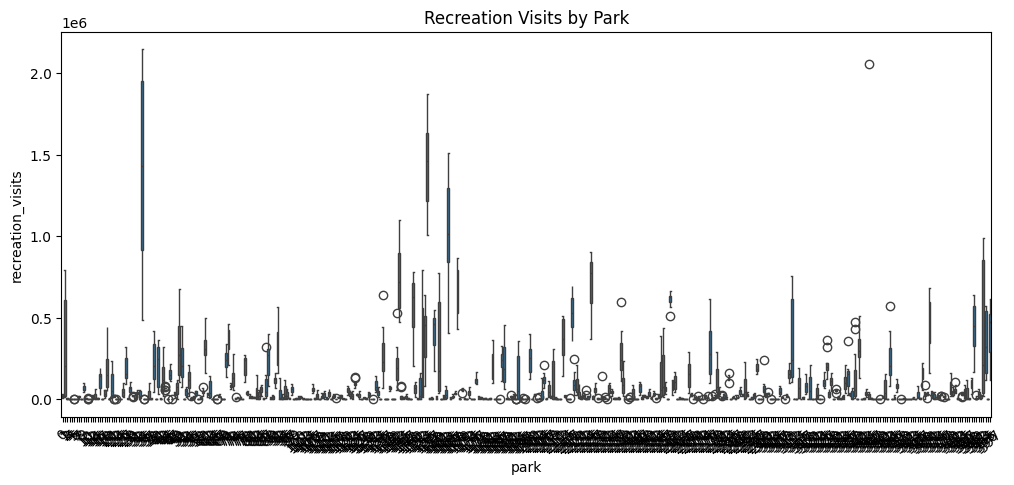

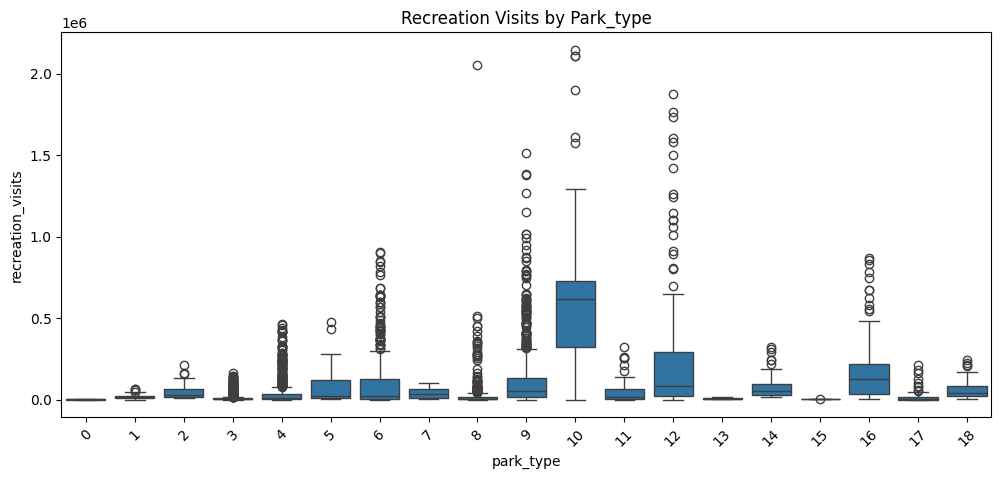

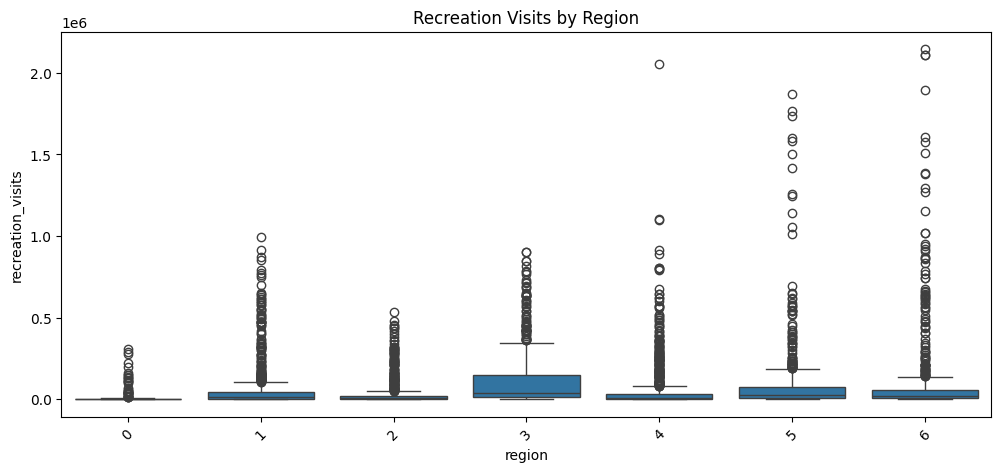

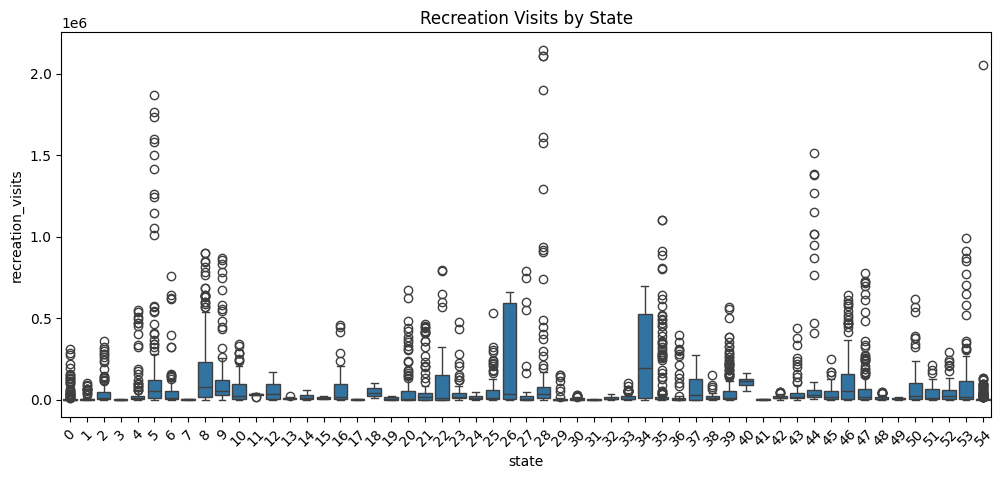

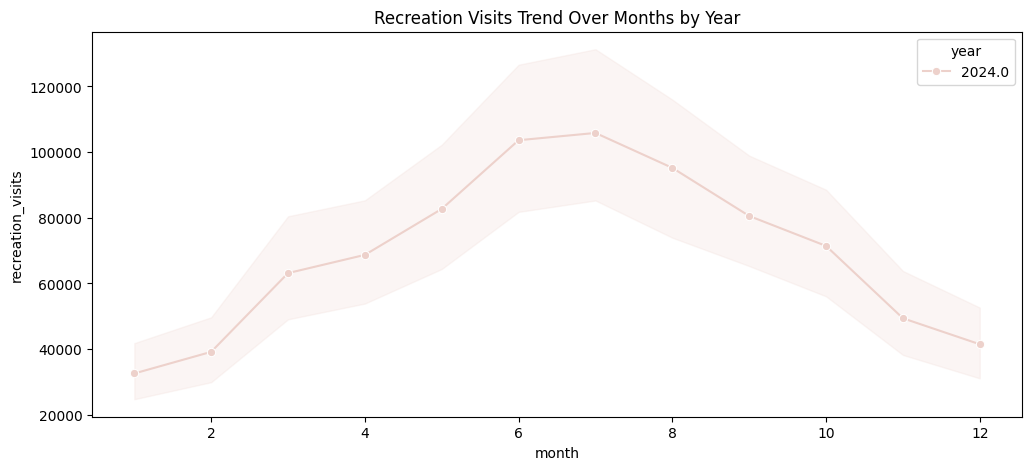

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and cleaned as before
# For example:
# df = pd.read_csv('National park service.csv', skiprows=2)
# ... cleaning steps as before ...

# 1. Basic info and summary
print("Data Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# 2. Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# 3. Distribution of target variable (Recreation Visits)
plt.figure(figsize=(8,5))
sns.histplot(df['recreation_visits'], bins=30, kde=True)
plt.title('Distribution of Recreation Visits')
plt.xlabel('Recreation Visits')
plt.ylabel('Frequency')
plt.show()

# 4. Distribution of Recreation Hours (related numeric variable)
plt.figure(figsize=(8,5))
sns.histplot(df['recreation_hours'], bins=30, kde=True, color='orange')
plt.title('Distribution of Recreation Hours')
plt.xlabel('Recreation Hours')
plt.ylabel('Frequency')
plt.show()

# 5. Boxplots for numeric variables to check outliers
numeric_cols = ['recreation_visits', 'recreation_hours', 'year', 'month']
plt.figure(figsize=(12,6))
df[numeric_cols].boxplot()
plt.title('Boxplots for Numeric Columns')
plt.show()

# 6. Correlation heatmap between numeric variables
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Numeric Variables')
plt.show()

# 7. Recreation Visits by categorical variables (boxplots)
cat_cols = ['park', 'park_type', 'region', 'state']
for col in cat_cols:
    plt.figure(figsize=(12,5))
    sns.boxplot(x=df[col], y=df['recreation_visits'])
    plt.title(f'Recreation Visits by {col.capitalize()}')
    plt.xticks(rotation=45)
    plt.show()

# 8. Recreation Visits over time (Year and Month)
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x='month', y='recreation_visits', hue='year', marker='o')
plt.title('Recreation Visits Trend Over Months by Year')
plt.show()


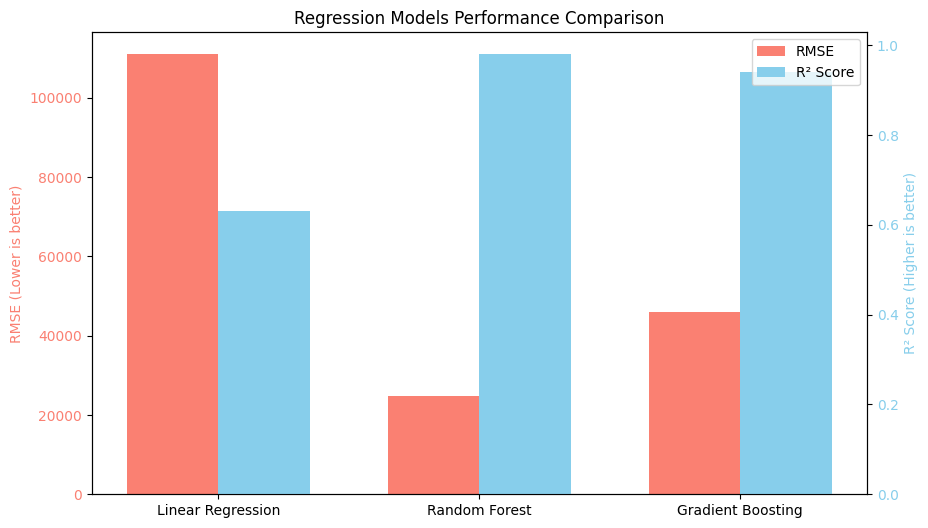

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Example results dictionary (replace with your actual results)
results = {
    "Linear Regression": {'RMSE': 110939.56, 'R2': 0.63},
    "Random Forest": {'RMSE': 24882.04, 'R2': 0.98},
    "Gradient Boosting": {'RMSE': 45898.58, 'R2': 0.94},
}

models = list(results.keys())
rmse_scores = [results[m]['RMSE'] for m in models]
r2_scores = [results[m]['R2'] for m in models]

x = np.arange(len(models))  # label locations
width = 0.35  # bar width

fig, ax1 = plt.subplots(figsize=(10,6))

# Plot RMSE bars
bars1 = ax1.bar(x - width/2, rmse_scores, width, label='RMSE', color='salmon')
ax1.set_ylabel('RMSE (Lower is better)', color='salmon')
ax1.tick_params(axis='y', labelcolor='salmon')

# Create second y-axis for R2 scores
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, r2_scores, width, label='R² Score', color='skyblue')
ax2.set_ylabel('R² Score (Higher is better)', color='skyblue')
ax2.tick_params(axis='y', labelcolor='skyblue')

# Model names on x-axis
ax1.set_xticks(x)
ax1.set_xticklabels(models)
plt.title('Regression Models Performance Comparison')

# Add legends
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.show()


In [45]:
X_train.columns.tolist()


['park',
 'unit_code',
 'park_type',
 'region',
 'state',
 'year',
 'month',
 'recreation_hours']

In [65]:

import pandas as pd

test_subject = pd.DataFrame([{
    'park': 'Yellowstone National Park',
    'unit_code': 'YELL',
    'park_type': 'National Park',
    'region': 'Intermountain',
    'state': 'WY',
    'year': 2025,
    'month': 7,
    'recreation_hours': 850000
}])
for col in test_subject.columns:
    if col in encoders:
        # Only transform values seen during training, else set to np.nan
        le = encoders[col]
        test_subject[col] = test_subject[col].apply(
            lambda x: le.transform([x])[0] if x in le.classes_ else np.nan
        )


In [66]:
prediction = best_model.predict(test_subject)
print("🎯 Predicted Recreation Visits:", int(prediction[0]))


🎯 Predicted Recreation Visits: 1293427
